In [1]:
from sklearn import datasets
from sklearn.cluster import Birch
import pandas as pd
import seaborn as sns
import matplotlib as plt
from umap import UMAP

from DataSetFactory import DataSetFactory

In [34]:
ds = DataSetFactory.get_dataset('hourglass')

In [35]:
anchors_dfs_hg = []
for label in sorted(ds.df[ds.label_col].unique()):
    df_label = ds.df[ds.df[ds.label_col]==label]
    birch = Birch(threshold=0.30, branching_factor=50, n_clusters=None)
    birch.fit(df_label[ds.feature_cols].values)
    tmp_df = pd.DataFrame(birch.subcluster_centers_, columns=['x', 'y', 'z'])
    tmp_df[ds.label_col] = label
    counts = pd.Series(birch.labels_).value_counts().to_frame()
    counts.columns = ['counts']
    tmp_df = tmp_df.merge(counts, left_index=True, right_index=True)
    anchors_dfs_hg.append(tmp_df)
anchors_df_hg = pd.concat(anchors_dfs_hg)

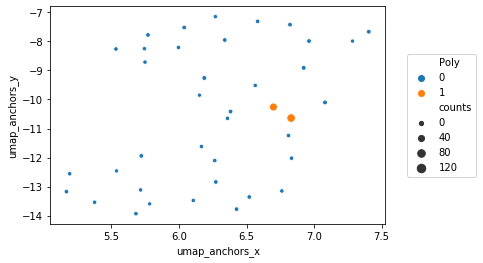

In [36]:
# UMAP on anchors
umap_anchors = UMAP(n_components=2)
umap_anchors_res = umap_anchors.fit_transform(anchors_df_hg[['x', 'y', 'z']].values)
anchors_df_hg['umap_anchors_x'] = umap_anchors_res[:, 0]
anchors_df_hg['umap_anchors_y'] = umap_anchors_res[:, 1]
g = sns.scatterplot(x='umap_anchors_x', y='umap_anchors_y', hue=ds.label_col, size='counts', data=anchors_df_hg)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

In [37]:
import plotly.graph_objects as go
from ClusterPlot import ClusterPlot

In [21]:
DEFAULT_PLOTLY_COLORS = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                             'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                             'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                             'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                             'rgb(188, 189, 34)', 'rgb(23, 190, 207)']
fig = go.Figure()
color = iter(DEFAULT_PLOTLY_COLORS)
for label in sorted(anchors_df_hg[ds.label_col].unique()):
    points = anchors_df_hg[anchors_df_hg[ds.label_col] == label][['x', 'y']].values
    print(points)
    concave_hulls = ClusterPlot.get_concave_hull(points, alpha=0.3)

    anchors_tmp = anchors_df_hg[anchors_df_hg[ds.label_col] == label][['x', 'y']].values
    c = next(color)
    fig.add_trace(go.Scatter(x=anchors_tmp[:, 0], y=anchors_tmp[:, 1],
                             mode='markers',
                             marker_color=c,
                             name=f'digit_{label}'))
    for concave_hull in concave_hulls:
        fig.add_trace(go.Scatter(x=concave_hull[:, 0],
                                 y=concave_hull[:, 1],
                                 fill='toself',
                                 marker_color=c,
                                 name=f'digit_{label}'))
fig.show()

[[6.24669206 1.16346089]
 [3.7944215  2.49873466]
 [3.03123761 1.11976139]
 [3.56955407 0.84390051]
 [1.74605288 1.94198519]
 [1.73639411 2.46036879]
 [8.1568485  1.28781642]
 [2.47078524 3.10841247]
 [6.36788284 2.1151373 ]
 [3.31591691 2.95980761]
 [7.56463566 2.82911529]
 [4.43842583 2.46276502]
 [3.28560911 2.06488235]
 [4.29974048 1.53611018]
 [2.55534629 2.42241435]
 [5.59650376 1.41892745]
 [3.55125628 1.46872926]
 [5.53258251 2.08365336]
 [6.84019443 2.20751284]
 [2.1555983  1.2821467 ]
 [6.93319645 1.42853378]
 [7.03581953 3.14187945]
 [8.11014046 2.48945813]
 [7.51951348 1.28411104]
 [2.41579054 1.84218967]
 [7.43285846 2.13517019]
 [6.14268687 2.92626683]
 [4.88818246 2.39998314]
 [4.01316853 2.93767035]
 [6.77894172 3.48957247]
 [4.86695733 1.62279344]
 [4.06438678 1.17692752]
 [5.49819092 2.58558236]
 [6.29132447 1.60981791]
 [3.06228324 1.56099143]
 [3.15106065 0.49192041]
 [8.08252218 1.92781642]
 [6.46562114 0.67957874]
 [3.83985369 1.86273763]]
[[4.99567053 1.98819545]

TypeError: 'Point' object is not iterable